In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Kutubxonalarni yuklash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

#Ma'lumotlarni yuklash va ularni o'tganish

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/2CustomerChurn/train_dataset.csv',index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
#df['Gender'].unique(), df['Class'].unique(), df['Type of Travel'].unique(), df['Customer Type'].unique(), 

(array(['Male', 'Female'], dtype=object),
 array(['Eco', 'Business', 'Eco Plus'], dtype=object),
 array(['Business travel', 'Personal Travel'], dtype=object),
 array(['disloyal Customer', 'Loyal Customer'], dtype=object))

In [ ]:
#df.replace({'Male':1, 'Female':0}, inplace=True)

In [ ]:
#df.replace({'Business travel':1, 'Personal Travel':0}, inplace=True)

In [ ]:
#df.replace({'Business':2, 'Eco Plus':1, 'Eco':0}, inplace=True)

In [ ]:
#df.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)

In [6]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [8]:
df.shape

(10000, 23)

In [9]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.668700,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.997799,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


labellar sonini kuramiz

In [10]:
df.satisfaction.value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

#Sonli Ustunlar korreliasiyasi

In [11]:
df.corr().abs().style.background_gradient(cmap='coolwarm')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019221,0.144302
Flight Distance,0.110823,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002841,0.298703
Inflight wifi service,0.020904,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023277,0.277395
Departure/Arrival time convenient,0.036071,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008799,0.067638
Ease of Online booking,0.026964,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003883,0.164662
Gate location,0.012077,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000727,0.007169
Food and drink,0.021971,0.065939,0.119807,0.001982,0.017193,0.002645,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.011761,0.011222,0.207854
Online boarding,0.215613,0.213859,0.438034,0.046456,0.388220,0.003610,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.001727,0.003483,0.504986
Seat comfort,0.169291,0.170203,0.107020,0.002102,0.016831,0.008359,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.014833,0.013604,0.342294
Inflight entertainment,0.097421,0.150573,0.198351,0.007094,0.043574,0.001144,0.598209,0.292397,0.615310,1.000000,0.442295,0.338588,0.393506,0.109921,0.418871,0.688927,0.029500,0.028990,0.400900


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [14]:
df.corrwith(df.satisfaction).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

#Ustunlar uchun Pipeline yaratish kk(DF dagi barcha qiymatlar ustida train qilish uchun)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [24]:
num_pipeline = Pipeline(
    [
    ('NaN_imputer', SimpleImputer(strategy='mean')), #agar kelajakda sonli ustunlarda NaN qiymatlar bulsa
    ('std_scaler', StandardScaler())
    ]
    )

correliasiyasi baland sonli ustunlar

In [25]:
num_cols = ['Online boarding', 
            'Inflight entertainment',
            'Seat comfort',
            'On-board service',
            'Leg room service',
            'Cleanliness',
            'Flight Distance',
            'Inflight wifi service',
            'Baggage handling',
            'Inflight service',
            'Checkin service',
            'Food and drink',
            'Ease of Online booking',
            'Age']
cat_cols = ['Gender',
            'Customer Type',
            'Type of Travel',
            'Class']

In [26]:
full_pipeline = ColumnTransformer(
    [('num_scal',num_pipeline, num_cols),
     ('cat', OneHotEncoder(), cat_cols)
    ]
)

In [29]:
X_pipeline = full_pipeline.fit_transform(df)
X_pipeline[:,3]

array([-0.35623706,  1.21274359, -1.9252177 , ...,  0.42825327,
        0.42825327,  0.42825327])

In [30]:
y = df['satisfaction'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pipeline, y,test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

#LogisticRegression model

In [32]:
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = LogReg_model.predict(X_test)

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.88      0.86      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



Model aniqligi:  0.8685


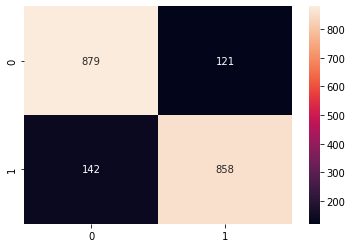

In [37]:
print('Model aniqligi: ', metrics.accuracy_score(y_test, y_pred))
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

#Support Vector Machine model

In [38]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, y_pred))
print('Model aniqligi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.95      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi:  0.9395


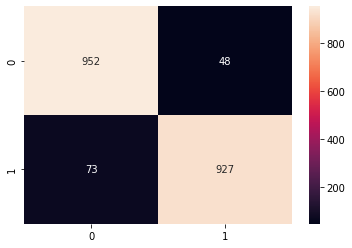

In [40]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

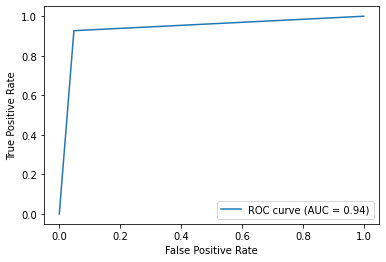

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr,
                                  tpr = tpr,
                                  roc_auc = roc_auc,
                                  estimator_name = 'ROC curve')
display.plot()
plt.show()

#Decision Tree model

In [42]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = DT_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('model aniqligi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1000
           1       0.91      0.93      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

model aniqligi:  0.9195


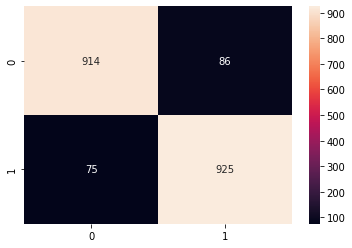

In [44]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

#Random Forest model

In [45]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=9)

In [46]:
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('model aniqligi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.94      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

model aniqligi:  0.937


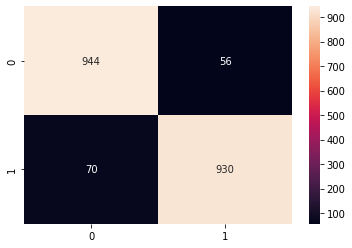

In [47]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

#XGBoost model

In [48]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)


In [49]:
print(metrics.classification_report(y_test, y_pred))
print('model aniqligi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.95      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

model aniqligi:  0.943


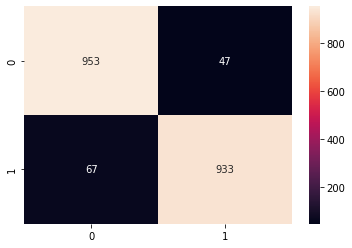

In [50]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

#KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNC_model = KNeighborsClassifier(n_neighbors=11)

In [62]:
KNC_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [63]:
y_pred = KNC_model.predict(X_test)

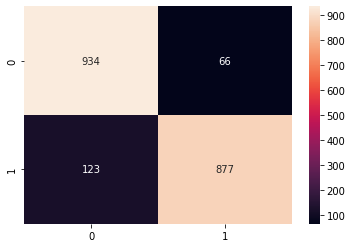

In [64]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_mat,annot= True, fmt='g')
plt.show()

In [65]:
print(metrics.classification_report(y_test, y_pred))
print('model aniqligi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1000
           1       0.93      0.88      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

model aniqligi:  0.9055


#n_neighbors ning optimal qiymatini aniqlaymiz

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gscv = GridSearchCV(KNC_model, param_grid,cv=5)
knn_gscv.fit(X_pipeline,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [58]:
knn_gscv.cv_results_['rank_test_score']
knn_gscv.best_params_

{'n_neighbors': 11}

In [59]:
knn_gscv.best_score_

0.9099999999999999

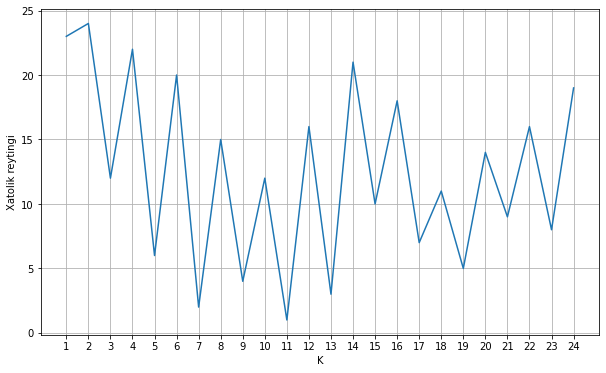

In [60]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'],
         knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('K')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()


#Natijaviy ishlar

In [66]:
#Eng yaxshi model XGBoost bo'lgani uchun tuliq train(10000) ma'lumotlari asosida 
#model yaratamiz va uni test uchun ajratilgan fayldagi ma'lumotlar asosida bashorat qilamiz
#aniqlik - 0.9415
XGB_model_full = XGBClassifier()

XGB_model_full.fit(X_pipeline,y)

XGBClassifier()

In [67]:
#TestSet ni yuklab olamiz
df_test_set = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/2CustomerChurn/test_dataset.csv',
                          index_col=0)
df_test_set.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0


In [68]:

X_testSet = full_pipeline.fit_transform(df_test_set)
X_testSet[0:5,:]

array([[-0.26508804, -1.06790393,  1.1264099 ,  0.46600793,  0.4608322 ,
         1.25053935,  1.4675743 , -0.55639009, -0.53165112, -2.26194287,
         1.3243262 , -0.96110758, -0.54434125, -1.00949875,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.47538135, -1.06790393,  0.36826761, -1.10238223, -1.02512411,
        -0.26503629,  0.40000693, -1.28062061, -1.3738707 , -1.41777684,
         0.52917387, -0.2100956 , -1.23469159,  0.61798677,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 1.21585073,  1.20101376,  1.1264099 ,  1.25020301,  1.20381035,
         0.49275153, -0.86902552,  0.89207093,  1.15278806,  1.11472124,
         0.52917387, -0.96110758,  0.83635944,  0.75361056,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.    

In [69]:
y_pred = XGB_model_full.predict(X_testSet)

In [70]:
finally_pred = pd.DataFrame({'id':df_test_set.index, "satisfaction":y_pred})
finally_pred.head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [71]:
finally_pred.to_csv(
    '/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/2CustomerChurn/XGB_model_943.csv', index=False)